Sample 0
Sample 1000
Sample 2000
Sample 3000
Sample 4000
Sample 5000
Sample 6000
Sample 7000
Sample 8000
Sample 9000
Sample 10000
Sample 11000
Sample 12000
Sample 13000
Sample 14000
Sample 15000
Sample 16000
Sample 17000
Sample 18000
Sample 19000


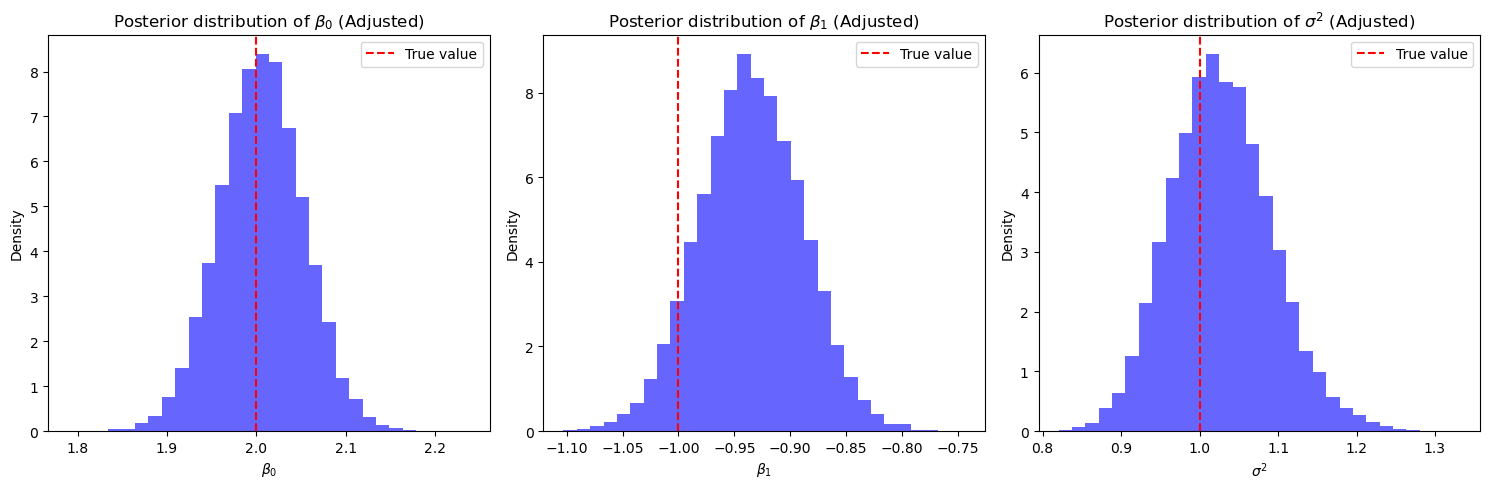

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma, multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)
# True parameters
beta_true = np.array([2.0, -1.0])   # true regression coefficients
sigma2_true = 1.0  # true variance of the noise

# Adjusting prior parameters and increasing sample size to reduce bias in estimates

# Updated simulation parameters
n = 500  # increase sample size to reduce prior influence
p = 2    # keep the same number of features

# Updated prior parameters for a more informative prior
Sigma_0_adjusted = np.eye(p) * 2  # narrower prior
alpha_0_adjusted = 3.0
beta_0_adjusted = 1.5

# Regenerate data with the same true values
X = np.random.randn(n, p)
Y = X @ beta_true + np.random.normal(0, np.sqrt(sigma2_true), n)
# Prior parameters
mu_0 = np.zeros(p)
Sigma_0 = np.eye(p) * 10
alpha_0 = 2.0
beta_0 = 2.0

# Gibbs sampling with adjusted parameters
num_samples = 20000  # increase number of samples for better convergence
burn_in = 4000

# Initialize storage for samples
beta_samples = np.zeros((num_samples, p))
sigma2_samples = np.zeros(num_samples)
beta_current = np.zeros(p)
sigma2_current = 1.0

# Gibbs sampling process with adjusted priors and sample size
for i in range(num_samples):
    if i % 1000 == 0:
        print(f"Sample {i}")
    # Sample beta given sigma^2
    Sigma_n = np.linalg.inv(X.T @ X / sigma2_current + np.linalg.inv(Sigma_0_adjusted))
    mu_n = Sigma_n @ (X.T @ Y / sigma2_current + np.linalg.inv(Sigma_0_adjusted) @ mu_0)
    beta_current = np.random.multivariate_normal(mu_n, Sigma_n)
    
    # Sample sigma^2 given beta
    alpha_n = alpha_0_adjusted + n / 2
    beta_n = beta_0_adjusted + 0.5 * np.sum((Y - X @ beta_current) ** 2)
    sigma2_current = invgamma.rvs(alpha_n, scale=beta_n)
    
    # Store samples
    beta_samples[i] = beta_current
    sigma2_samples[i] = sigma2_current

# Remove burn-in samples
beta_samples = beta_samples[burn_in:]
sigma2_samples = sigma2_samples[burn_in:]

# Plot: True values vs. Posterior Distributions
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot posterior distributions for each beta
for j in range(p):
    axs[j].hist(beta_samples[:, j], bins=30, density=True, alpha=0.6, color='b')
    axs[j].axvline(beta_true[j], color='r', linestyle='--', label='True value')
    axs[j].set_title(f"Posterior distribution of $\\beta_{j}$ (Adjusted)")
    axs[j].set_xlabel(f"$\\beta_{j}$")
    axs[j].set_ylabel("Density")
    axs[j].legend()

# Plot posterior distribution for sigma^2
axs[2].hist(sigma2_samples, bins=30, density=True, alpha=0.6, color='b')
axs[2].axvline(sigma2_true, color='r', linestyle='--', label="True value")
axs[2].set_title("Posterior distribution of $\\sigma^2$ (Adjusted)")
axs[2].set_xlabel("$\\sigma^2$")
axs[2].set_ylabel("Density")
axs[2].legend()

plt.tight_layout()
plt.show()
